In [0]:
# Importar librerías a utilizar
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import json

In [0]:
#load training data
with open('train_set_4_nodes.json') as json_file:
    data = json.load(json_file)

In [0]:
x_data=np.array(data[0])
y_data=np.array(data[1])

In [0]:
# Preparar también las etiquetas en categorías:
from keras.utils import to_categorical
from sklearn.utils import shuffle

In [0]:
categorical_y_data=to_categorical(y_data)

#shufle data
x_data, y_data = shuffle(x_data, y_data,random_state=40)
#Split data into train and test 
train_size = round(len(x_data)*0.7);
x_data_train, x_data_test = x_data[:train_size,:], x_data[train_size:,:]
y_data_train = y_data[:train_size]
y_data_test = y_data[train_size:]

In [0]:
# Crear la arquitectura de la red neuronal, formada por dos capas ocultas
# La capa de salida representa las 10 categorías posibles (0 a 9)
from keras import models
from keras import layers

network = models.Sequential()

# Capa de entrada (con 40 distancias de las faciallandmarks) y primera capa oculta 
network.add(layers.Dense(512, activation='relu', input_shape=(40,)))
# Segunda capa oculta 
network.add(layers.Dense(512, activation='tanh'))

# Capa de salida
network.add(layers.Dense(5, activation='softmax'))

# Definir la función de pérdida, el optimizador y las métricas para monitorizar el entrenamiento y la prueba de validación
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
# Realizar el entrenamiento. Guardar el resultado en una variable denominada ‘historia’
history = network.fit(x_data_train, y_data_train, epochs=350, batch_size=128, validation_data=(x_data_test, y_data_test))

Train on 920 samples, validate on 395 samples
Epoch 1/350
920/920 [==============================] - 2s 3ms/step - loss: 7.2238 - acc: 0.1804 - val_loss: 7.0307 - val_acc: 0.2203
Epoch 2/350
920/920 [==============================] - 0s 60us/step - loss: 7.0851 - acc: 0.2120 - val_loss: 6.9693 - val_acc: 0.1949
Epoch 3/350
920/920 [==============================] - 0s 58us/step - loss: 7.0539 - acc: 0.2054 - val_loss: 6.9426 - val_acc: 0.1975
Epoch 4/350
920/920 [==============================] - 0s 57us/step - loss: 7.0494 - acc: 0.2228 - val_loss: 7.0657 - val_acc: 0.1949
Epoch 5/350
920/920 [==============================] - 0s 56us/step - loss: 7.0559 - acc: 0.2250 - val_loss: 7.2092 - val_acc: 0.2253
Epoch 6/350
920/920 [==============================] - 0s 63us/step - loss: 6.5607 - acc: 0.2337 - val_loss: 4.8804 - val_acc: 0.1949
Epoch 7/350
920/920 [==============================] - 0s 55us/step - loss: 4.4102 - acc: 0.1978 - val_loss: 3.4633 - val_acc: 0.1949
Epoch 8/350
920/9

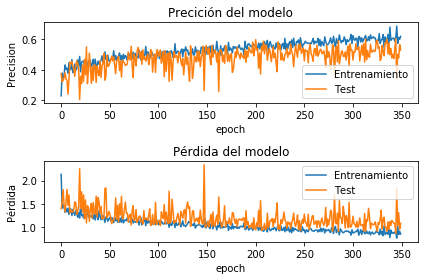

In [0]:
# Visualizar las métricas
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Precición del modelo')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Test'], loc='upper right')

plt.tight_layout()

plt.show()

In [0]:
#fig

# Comprobar el ajuste o error del modelo respecto del conjunto de prueba
test_loss, test_acc = network.evaluate(x_data_test, y_data_test)
print('test_acc:', test_acc)

395/395 [==============================] - 0s 99us/step
test_acc: 0.7012658235392993


In [0]:
# Guardar el modelo en formato JSON
from keras.models import model_from_json
model_json = network.to_json()
with open("network_clase.json", "w") as json_file:
    json_file.write(model_json)

# Guardar los pesos (weights) a formato HDF5
network.save_weights("network_weights_clase.h5")
print("Guardado el modelo a disco")

Guardado el modelo a disco


In [0]:
# Leer JSON y crear el modelo
from keras.models import model_from_json
from keras.datasets import mnist

json_file = open("version_1/network_clase.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Cargar los pesos (weights) en un nuevo modelo
loaded_model.load_weights("network_weights_clase.h5")
print("Modelo cargado desde el disco")

Modelo cargado desde el disco


In [0]:
# Predecir sobre el conjunto de test
predicted_classes = loaded_model.predict_classes(x_data_test)

In [0]:
print(predicted_classes)

[4 4 2 4 4 3 2 1 3 0 3 4 2 0 4 0 2 2 2 3 4 3 4 0 2 0 4 3 2 2 2 3 2 2 2 4 1
 2 1 0 2 2 2 3 4 0 3 3 3 4 2 4 1 0 0 2 2 2 1 3 0 2 4 1 4 3 3 4 4 1 3 1 2 2
 3 2 4 4 3 2 2 3 4 1 0 0 2 3 2 4 1 0 3 4 3 3 4 1 3 1 4 3 3 4 0 4 4 4 0 3 0
 3 1 3 0 0 2 3 4 0 1 2 3 0 2 1 2 4 0 3 3 0 4 2 2 3 2 3 4 4 2 4 2 3 1 2 3 1
 0 2 0 2 0 4 3 4 2 3 4 0 1 2 4 4 0 2 4 3 4 0 4 4 2 0 4 1 0 4 2 1 1 0 4 2 0
 3 4 0 0 2 1 2 4 3 3 2 3 4 2 3 2 1 4 4 0 4 2 0 3 3 2 3 3 4 2 2 2 2 2 3 4 3
 3 0 2 2 2 4 2 3 2 0 4 2 2 1 3 2 2 2 3 3 1 3 4 3 0 3 2 2 2 3 4 1 1 3 2 3 2
 0 1 1 4 1 0 0 4 1 4 3 2 2 3 2 4 2 0 4 2 3 4 2 2 2 3 4 3 0 4 2 2 0 0 0 3 0
 1 0 4 4 2 4 0 2 3 4 2 0 1 2 3 2 1 1 3 2 0 2 2 2 3 3 1 0 1 4 3 2 4 4 2 0 2
 3 2 4 3 3 2 2 1 2 4 0 2 1 3 2 4 3 0 4 2 3 0 1 1 3 1 3 1 1 0 4 2 4 4 2 4 2
 3 1 2 2 3 0 1 3 3 0 0 1 1 1 0 1 0 0 4 4 0 2 0 2 3]


In [0]:
# Comprobar que predicciones son correctas y cuales no
right_predicted=0
wrong_predicted=0
for i in range(len(predicted_classes)):
  if(predicted_classes[i]==np.nonzero(y_data_test[i])):
    right_predicted = right_predicted +1
  else:
    wrong_predicted = wrong_predicted + 1

print(right_predicted," clasificados correctamente")
print(wrong_predicted," clasificados incorrectamente")

293  clasificados correctamente
102  clasificados incorrectamente
